## Ultimate Coding Challenge - Part 1

**ANSWER**

After importing packages and the json file, I dove into the login data.

First, let's take a look at demand cycles. Looking at the graph below, we see a few things:
1. There are some intense spikes around March 1 and April 1 & 4. I ran some analysis on the data, and it looks like 1% of the data is duplicated (down to the second). This needs further exploration to know exactly what is going on. See first graph below.
2. In the second graph, we zoom into a set of 15 days where we can see that the logins peak roughly once per week, but they peak on Jan. 11, Jan. 20 and Feb. 4. At first glance, there is no rhyme or reason to the peaks.
3. If you zoom in even more, you'll see that daily peaks occur (1) between Midnight and 2 am as well as (2) at the Noon hour.

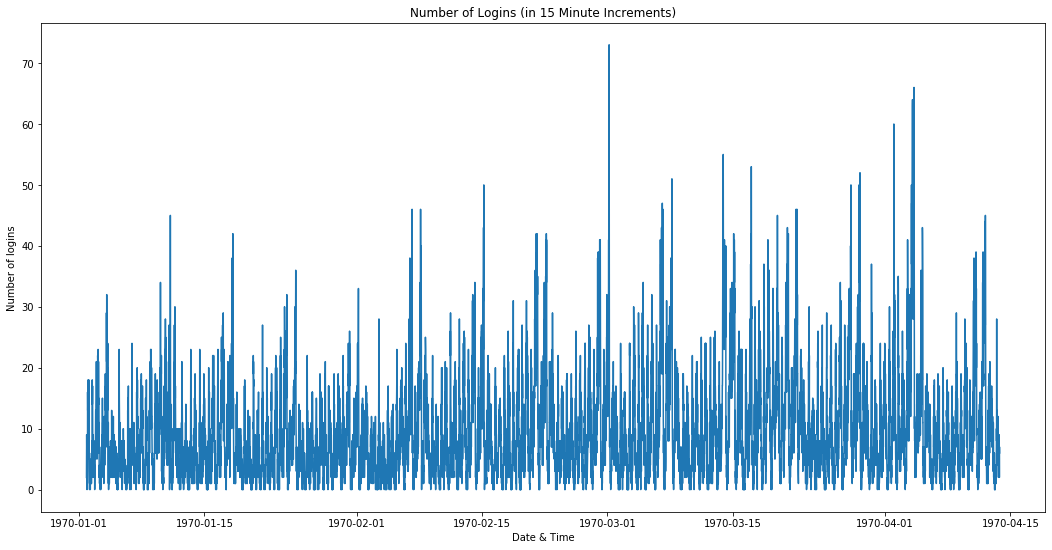

In [13]:
'''fig= plt.figure(figsize=(18,9))
plt.plot(logins_15)
plt.title("Number of Logins (in 15 Minute Increments)")
plt.xlabel('Date & Time')
plt.ylabel('Number of logins')
plt.show()'''

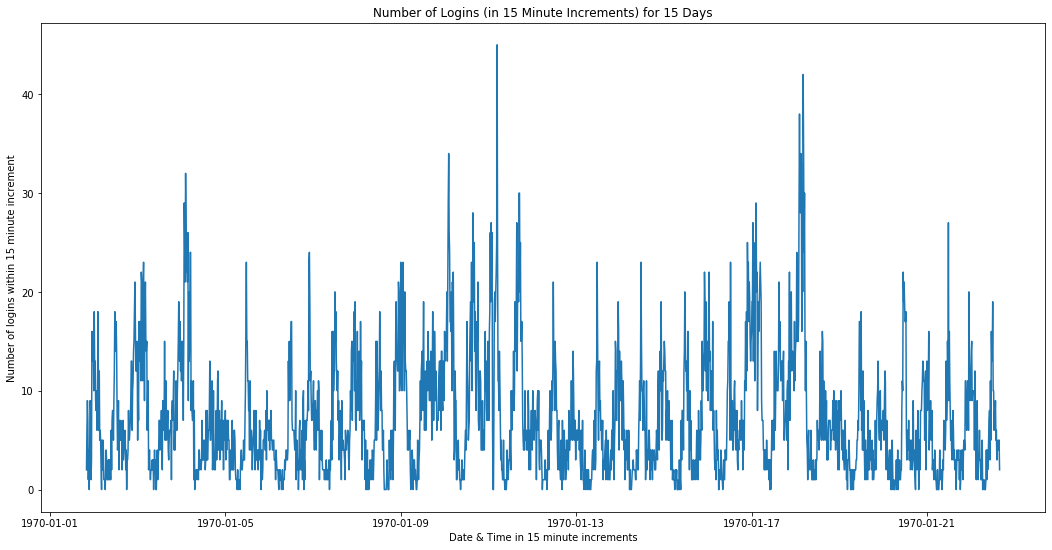

In [14]:
'''fig= plt.figure(figsize=(18,9))
plt.plot(logins_15.iloc[0:2000, :])
plt.title("Number of Logins (in 15 Minute Increments) for 15 Days")
plt.xlabel('Date & Time in 15 minute increments')
plt.ylabel('Number of logins within 15 minute increment')
plt.show()'''

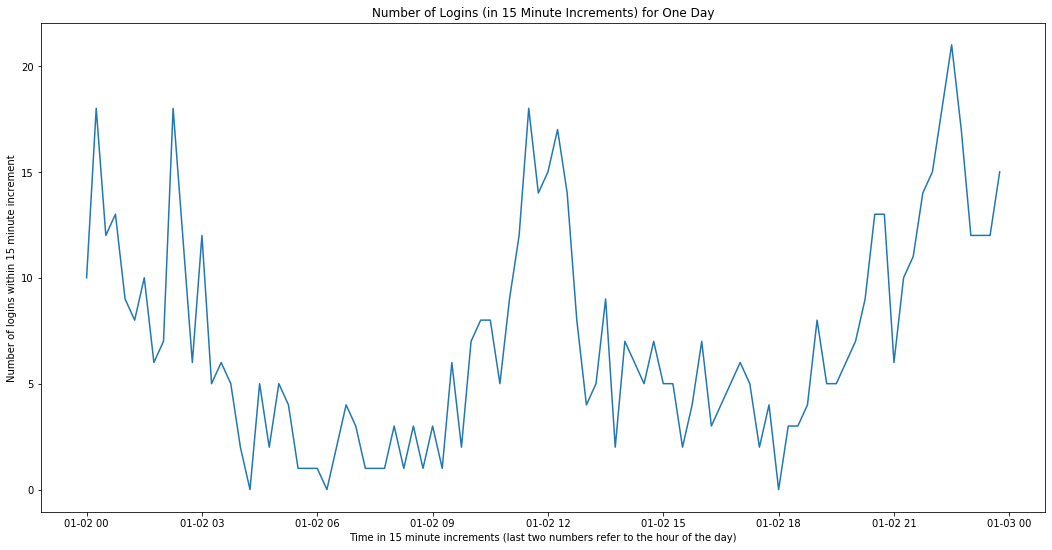

In [15]:
'''fig= plt.figure(figsize=(18,9))
plt.plot(logins_15.iloc[16:112, :])
plt.title("Number of Logins (in 15 Minute Increments) for One Day")
plt.xlabel('Time in 15 minute increments (last two numbers refer to the hour of the day)')
plt.ylabel('Number of logins within 15 minute increment')
plt.show()'''

**CODE**

In [1]:
# Import pacakges.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data.

logins = pd.read_json(path_or_buf='logins.json', orient='records')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [4]:
duplicated = logins[logins.duplicated(['login_time'])]
print(duplicated)

               login_time
354   1970-01-02 10:59:52
434   1970-01-02 12:27:48
506   1970-01-02 15:08:27
524   1970-01-02 16:14:36
675   1970-01-02 22:03:36
...                   ...
92051 1970-04-12 05:24:21
92367 1970-04-12 15:46:43
92439 1970-04-12 17:12:21
92986 1970-04-13 12:23:46
93022 1970-04-13 13:44:18

[877 rows x 1 columns]


In [5]:
logins.login_time = pd.to_datetime(logins.login_time, format='%Y%M%D')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [6]:
logins['login'] = 1
logins.head()

,login_time,login
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [7]:
logins.index = logins.login_time
logins.drop('login_time', axis=1, inplace=True)
logins.head()

,login
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [8]:
logins_15 = logins.resample('15T').sum()
logins_15.head()

,login
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [9]:
logins_15.iloc[16,:]

login    10
Name: 1970-01-02 00:00:00, dtype: int64

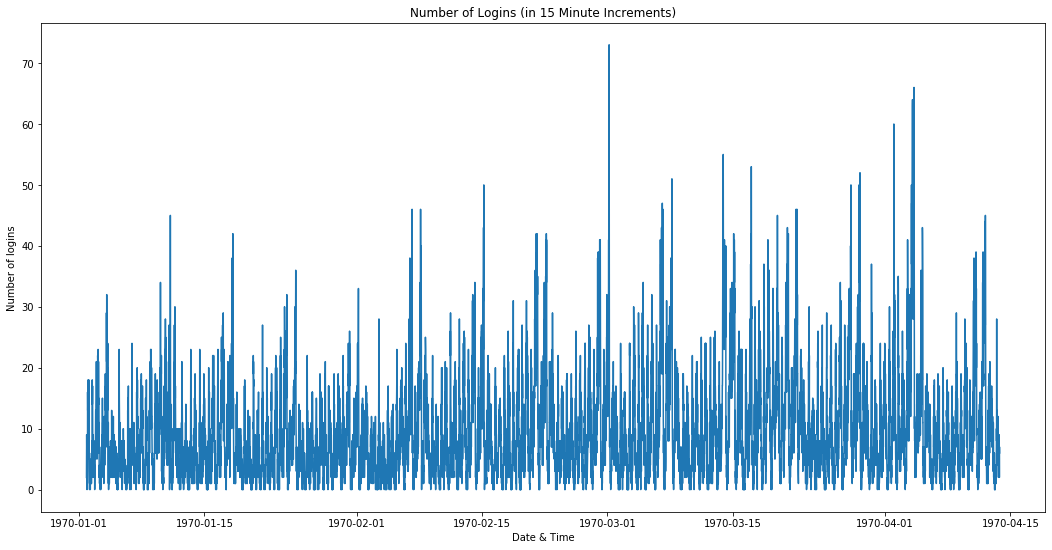

In [10]:
fig= plt.figure(figsize=(18,9))
plt.plot(logins_15)
plt.title("Number of Logins (in 15 Minute Increments)")
plt.xlabel('Date & Time')
plt.ylabel('Number of logins')
plt.show()

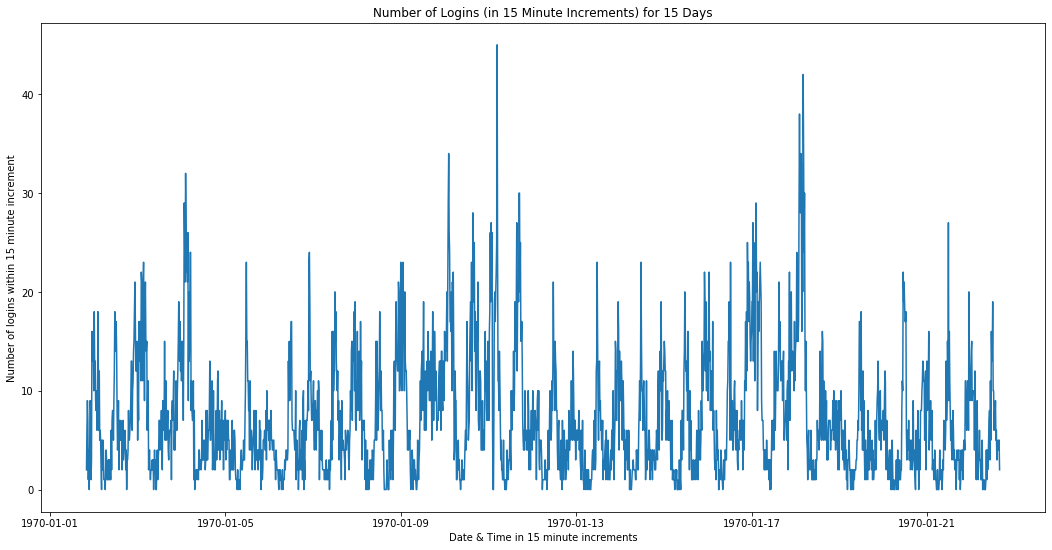

In [11]:
fig= plt.figure(figsize=(18,9))
plt.plot(logins_15.iloc[0:2000, :])
plt.title("Number of Logins (in 15 Minute Increments) for 15 Days")
plt.xlabel('Date & Time in 15 minute increments')
plt.ylabel('Number of logins within 15 minute increment')
plt.show()

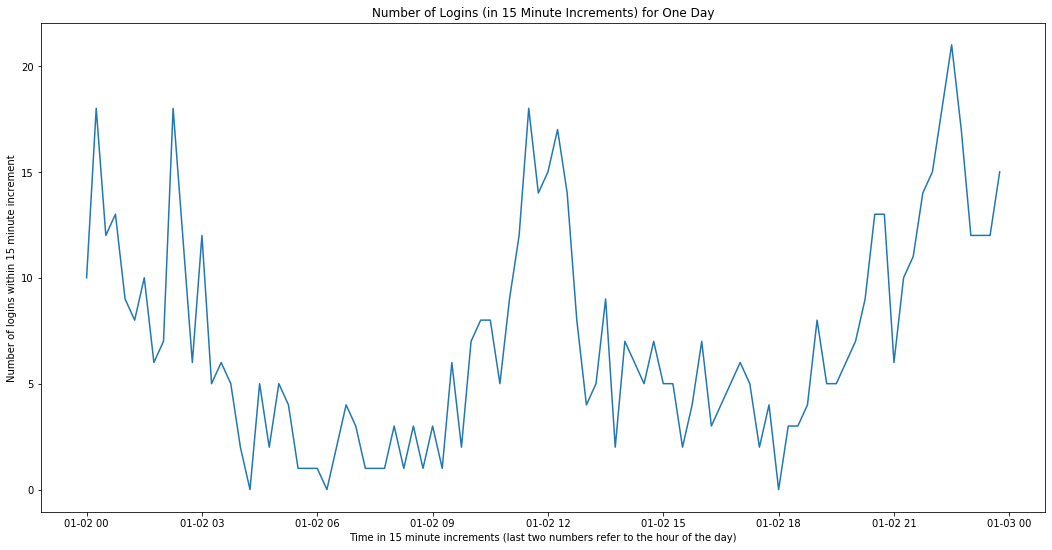

In [12]:
fig= plt.figure(figsize=(18,9))
plt.plot(logins_15.iloc[16:112, :])
plt.title("Number of Logins (in 15 Minute Increments) for One Day")
plt.xlabel('Time in 15 minute increments (last two numbers refer to the hour of the day)')
plt.ylabel('Number of logins within 15 minute increment')
plt.show()